# Imports

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.signal as signal
import scipy.linalg as linalg
import seaborn as sns
%matplotlib inline

# Define params

In [52]:
Lx = 10000;
L = 18;
A = 1;
fx = 1;
fp = 1000;
dt = 1/fp;
t = dt*np.linspace(0,Lx-1,Lx)

# Prepare signals

## Create White Noise

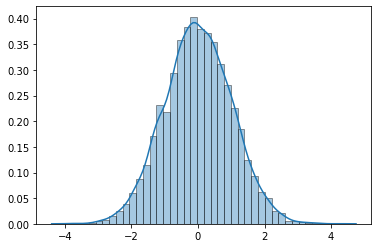

In [185]:
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, size=Lx)
sns.distplot(s, bins=40, hist_kws={'edgecolor':'black'})

## Create input signal

In [186]:
x = A*np.sin(2*np.pi*fx*t)
x = x+s

## Define Search Filter Transmitance

In [187]:
c = np.array([-0.0153, -0.0222, -0.0252, -0.0136, 0.0175, 0.0668, 0.1250, 0.1771, 0.2079, 0.2079, 0.1771, 0.1250, 0.0668, 0.0175, -0.0136, -0.0252, -0.0222, -0.0153])

In [188]:
h = signal.TransferFunction(c, 1, dt=dt)
h_tf = (1,c,dt)

In [189]:
w, mag, phase = signal.dbode(h)

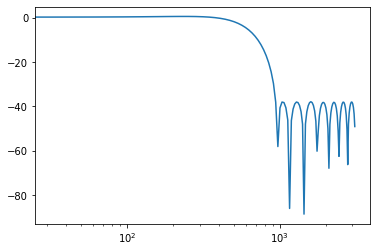

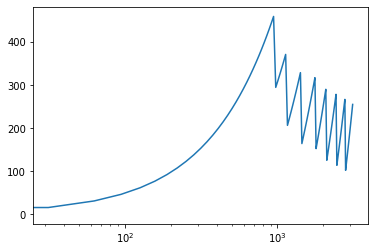

In [190]:
plt.figure()
plt.semilogx(w, mag)
plt.figure()
plt.semilogx(w, phase)

In [191]:
d = signal.filtfilt(c,1,x)

# Wiener-Hopf Solution

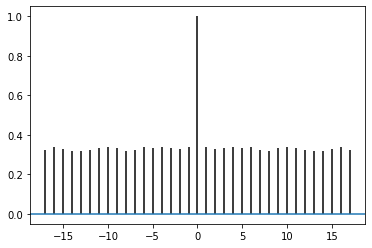

In [197]:
_, rxx, _, _ = plt.xcorr(x,x,maxlags=L-1)

In [234]:
R = linalg.toeplitz(rxx[L-2:-1:1], rxx[L-1:2*L])

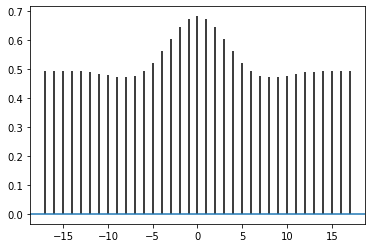

In [218]:
_, rdx, _, _ = plt.xcorr(d,x,maxlags=L-1)

In [243]:
p = rdx[L-1:2*L].reshape(18,1)

In [248]:
h_opt = linalg.inv(R) @ p

In [250]:
h_opt.shape

(18, 1)

In [251]:
h_compute = signal.TransferFunction(h_opt.reshape(18), 1, dt=dt)
w, mag, phase = signal.dbode(h_compute)

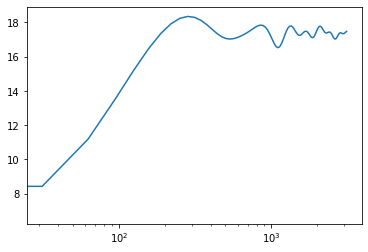

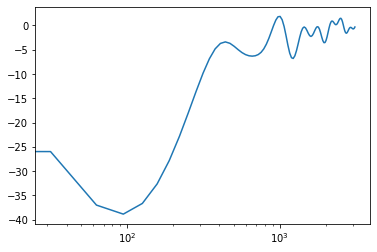

In [252]:
plt.figure()
plt.semilogx(w, mag)
plt.figure()
plt.semilogx(w, phase)